In [6]:
import pandas as pd
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import tensorflow as tf

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [7]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/kamalyosh21/Sentimen-analysis-bibit/main/ulasan_aplikasi.csv')
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,67af427b-48f1-46cf-92dc-8c796b047c67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa.. fitur pencairan instan tiba-tiba tida...,1,23,3.94.0,2025-04-02 12:09:29,"Hai kak, mohon maaf atas ketidaknyamanan yg di...",2025-04-03 13:04:25,3.94.0
1,a4d66b3e-b3f7-474d-b2c6-2e25f7d3f793,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aku saya lupa pin, saat ingin rubah pin di sur...",1,10,3.94.0,2025-04-07 11:06:22,"Hai kak, mohon maaf atas ketidaknyamanan yang ...",2025-04-08 05:33:48,3.94.0
2,1e4c652a-c7d6-44a4-be8a-2823168f890b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa gk bisa login, pesan yg muncul bila...",1,17,3.93.0,2025-03-08 11:32:12,"Hai kak, kemungkinan jaringan internet kakak t...",2025-03-09 05:15:36,3.93.0
3,ae6d4ef6-ed38-4bf2-a6af-73f03a2ebd1b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk nya memang mudah di pahami untuk para pemu...,1,30,3.93.0,2025-03-12 09:12:39,"Hai kak ..., pembelian dan penjualan reksa dan...",2025-03-12 15:37:46,3.93.0
4,8c60b9e2-c334-4de6-af54-72865b755593,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nyimpen Dana Darurat di produk Reksadana Pasar...,1,11,3.94.0,2025-04-05 13:37:47,Hai kak. Mohon maaf atas ketidaknyamanannya. T...,2025-04-06 10:47:43,3.94.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39626 entries, 0 to 39625
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              39626 non-null  object
 1   userName              39626 non-null  object
 2   userImage             39626 non-null  object
 3   content               39626 non-null  object
 4   score                 39626 non-null  int64 
 5   thumbsUpCount         39626 non-null  int64 
 6   reviewCreatedVersion  34001 non-null  object
 7   at                    39626 non-null  object
 8   replyContent          6112 non-null   object
 9   repliedAt             6112 non-null   object
 10  appVersion            34001 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.3+ MB


In [5]:
# Cek Jumlah Missing Values
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,5625
at,0
replyContent,33514
repliedAt,33514


In [9]:
# Missing values
print("\nMissing values in df:", df.isnull().sum().sum())


Missing values in df: 78278


In [7]:
# Cek Duplikasi
df.duplicated().sum()


np.int64(0)

In [10]:
df_clean = df.dropna(axis=1, how='all')
df_clean = df.dropna(subset=['reviewCreatedVersion', 'appVersion'])
df_clean = df_clean.drop(['replyContent', 'repliedAt'], axis=1)

In [11]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34001 entries, 0 to 39609
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              34001 non-null  object
 1   userName              34001 non-null  object
 2   userImage             34001 non-null  object
 3   content               34001 non-null  object
 4   score                 34001 non-null  int64 
 5   thumbsUpCount         34001 non-null  int64 
 6   reviewCreatedVersion  34001 non-null  object
 7   at                    34001 non-null  object
 8   appVersion            34001 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


# Preprocessing



In [14]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # Memecah teks
    words = text.split()
    # Menerapkan stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [19]:
df_clean

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,67af427b-48f1-46cf-92dc-8c796b047c67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa.. fitur pencairan instan tiba-tiba tida...,1,23,3.94.0,2025-04-02 12:09:29,3.94.0
1,a4d66b3e-b3f7-474d-b2c6-2e25f7d3f793,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aku saya lupa pin, saat ingin rubah pin di sur...",1,10,3.94.0,2025-04-07 11:06:22,3.94.0
2,1e4c652a-c7d6-44a4-be8a-2823168f890b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa gk bisa login, pesan yg muncul bila...",1,17,3.93.0,2025-03-08 11:32:12,3.93.0
3,ae6d4ef6-ed38-4bf2-a6af-73f03a2ebd1b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk nya memang mudah di pahami untuk para pemu...,1,30,3.93.0,2025-03-12 09:12:39,3.93.0
4,8c60b9e2-c334-4de6-af54-72865b755593,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nyimpen Dana Darurat di produk Reksadana Pasar...,1,11,3.94.0,2025-04-05 13:37:47,3.94.0
...,...,...,...,...,...,...,...,...,...
39597,7737ffa6-59d0-4560-b475-3b68d771f56e,Muhammad Muhibbin,https://play-lh.googleusercontent.com/a-/ALV-U...,👍,5,0,3.0.8,2020-08-24 02:56:48,3.0.8
39598,5998b059-f69d-47eb-822e-71850c1a198d,Buyung Rasjid,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍👍,5,0,3.0.8,2020-08-25 15:47:38,3.0.8
39601,468c8a6e-ef3f-4d4c-a326-6511b8e55d27,Joglo Kedai,https://play-lh.googleusercontent.com/a/ACg8oc...,👍👍👍👍👍,5,0,3.0.6,2020-08-10 03:12:09,3.0.6
39607,f2d5c932-be7c-476b-a28c-6035eaae3b58,iPad aj,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍,5,0,3.0.6,2020-08-13 11:43:41,3.0.6


In [20]:
# Membersihkan teks d
df_clean['text_clean'] = df_clean['content'].apply(cleaningText)
# Mengubah huruf dalam teks menjadi huruf kecil
df_clean['text_casefoldingText'] = df_clean['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standa
df_clean['text_slangwords'] = df_clean['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata)
df_clean['text_tokenizingText'] = df_clean['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum)
df_clean['text_stopword'] = df_clean['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat
df_clean['text_akhir'] = df_clean['text_stopword'].apply(toSentence)

In [21]:
df_clean

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,67af427b-48f1-46cf-92dc-8c796b047c67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa.. fitur pencairan instan tiba-tiba tida...,1,23,3.94.0,2025-04-02 12:09:29,3.94.0,kecewa fitur pencairan instan tibatiba tidak b...,kecewa fitur pencairan instan tibatiba tidak b...,kecewa fitur pencairan instan tibatiba tidak b...,"[kecewa, fitur, pencairan, instan, tibatiba, t...","[kecewa, fitur, pencairan, instan, tibatiba, p...",kecewa fitur pencairan instan tibatiba percaya...
1,a4d66b3e-b3f7-474d-b2c6-2e25f7d3f793,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aku saya lupa pin, saat ingin rubah pin di sur...",1,10,3.94.0,2025-04-07 11:06:22,3.94.0,aku saya lupa pin saat ingin rubah pin di suru...,aku saya lupa pin saat ingin rubah pin di suru...,aku saya lupa pin saat ingin rubah pin di suru...,"[aku, saya, lupa, pin, saat, ingin, rubah, pin...","[lupa, pin, rubah, pin, suruh, masukan, ktp, k...",lupa pin rubah pin suruh masukan ktp kali coba...
2,1e4c652a-c7d6-44a4-be8a-2823168f890b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini kenapa gk bisa login, pesan yg muncul bila...",1,17,3.93.0,2025-03-08 11:32:12,3.93.0,Ini kenapa gk bisa login pesan yg muncul bilan...,ini kenapa gk bisa login pesan yg muncul bilan...,ini kenapa gk bisa login pesan yang muncul bil...,"[ini, kenapa, gk, bisa, login, pesan, yang, mu...","[gk, login, pesan, muncul, bilang, sinyal, jel...",gk login pesan muncul bilang sinyal jelek siny...
3,ae6d4ef6-ed38-4bf2-a6af-73f03a2ebd1b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk nya memang mudah di pahami untuk para pemu...,1,30,3.93.0,2025-03-12 09:12:39,3.93.0,Apk nya memang mudah di pahami untuk para pemu...,apk nya memang mudah di pahami untuk para pemu...,apk nya memang mudah di pahami untuk para pemu...,"[apk, nya, memang, mudah, di, pahami, untuk, p...","[apk, mudah, pahami, pemula, awam, ranting, bi...",apk mudah pahami pemula awam ranting bintang p...
4,8c60b9e2-c334-4de6-af54-72865b755593,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nyimpen Dana Darurat di produk Reksadana Pasar...,1,11,3.94.0,2025-04-05 13:37:47,3.94.0,Nyimpen Dana Darurat di produk Reksadana Pasar...,nyimpen dana darurat di produk reksadana pasar...,nyimpen dana darurat di produk reksadana pasar...,"[nyimpen, dana, darurat, di, produk, reksadana...","[nyimpen, dana, darurat, produk, reksadana, pa...",nyimpen dana darurat produk reksadana pasar ua...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39597,7737ffa6-59d0-4560-b475-3b68d771f56e,Muhammad Muhibbin,https://play-lh.googleusercontent.com/a-/ALV-U...,👍,5,0,3.0.8,2020-08-24 02:56:48,3.0.8,,,,[],[],
39598,5998b059-f69d-47eb-822e-71850c1a198d,Buyung Rasjid,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍👍,5,0,3.0.8,2020-08-25 15:47:38,3.0.8,,,,[],[],
39601,468c8a6e-ef3f-4d4c-a326-6511b8e55d27,Joglo Kedai,https://play-lh.googleusercontent.com/a/ACg8oc...,👍👍👍👍👍,5,0,3.0.6,2020-08-10 03:12:09,3.0.6,,,,[],[],
39607,f2d5c932-be7c-476b-a28c-6035eaae3b58,iPad aj,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍,5,0,3.0.6,2020-08-13 11:43:41,3.0.6,,,,[],[],


In [22]:
import re

# Memeriksa apakah 'content' hanya berisi emoji atau simbol non-teks
emoji_pattern = r'[^\w\s,]'  # Mencari karakter non-teks selain spasi dan kata
df_clean_emoji = df_clean[df_clean['content'].str.contains(emoji_pattern, na=False)]

# Menampilkan beberapa baris yang hanya berisi emoji atau simbol
print(df_clean_emoji[['content']].head())


                                             content
0  kecewa.. fitur pencairan instan tiba-tiba tida...
1  aku saya lupa pin, saat ingin rubah pin di sur...
2  Ini kenapa gk bisa login, pesan yg muncul bila...
3  Apk nya memang mudah di pahami untuk para pemu...
4  Nyimpen Dana Darurat di produk Reksadana Pasar...


In [23]:
# Menghapus baris yang hanya berisi emoji/simbol atau kosong
df_clean = df_clean[~df_clean['content'].str.contains(emoji_pattern, na=False)]

# Memeriksa hasil setelah menghapus baris yang berisi emoji/simbol
print(df_clean[['content']].head())


                                              content
8   aplikasi sangat buruk terutama, yang menangapi...
9   pencairan reksa dana katanya maksimal 7 hari i...
12  aplikasi nya lumayan bagus tapi untuk pelayana...
13  saat saya pingin buka selalu ga bisa padahal u...
16  aplikasi ini sangat berguna sekali untuk pemul...


In [24]:
# Fungsi untuk mengganti emoji dengan kata-kata
def replace_emoji_with_words(text):
    text = re.sub(r'👍', 'positif', text)  # Mengganti emoji 👍 dengan kata 'positif'
    text = re.sub(r'👎', 'negatif', text)  # Mengganti emoji 👎 dengan kata 'negatif'
    return text

# Gunakan .loc[] untuk menghindari peringatan view vs copy
df_clean.loc[:, 'content'] = df_clean['content'].apply(replace_emoji_with_words)

# Memeriksa hasilnya
print(df_clean[['content']].head())


                                              content
8   aplikasi sangat buruk terutama, yang menangapi...
9   pencairan reksa dana katanya maksimal 7 hari i...
12  aplikasi nya lumayan bagus tapi untuk pelayana...
13  saat saya pingin buka selalu ga bisa padahal u...
16  aplikasi ini sangat berguna sekali untuk pemul...


In [25]:
# Menghapus baris dengan teks kosong atau hanya spasi
df_clean = df_clean[df_clean['content'].str.strip().str.len() > 0]

# Memeriksa hasil setelah menghapus baris kosong
print(df_clean[['content']].head())


                                              content
8   aplikasi sangat buruk terutama, yang menangapi...
9   pencairan reksa dana katanya maksimal 7 hari i...
12  aplikasi nya lumayan bagus tapi untuk pelayana...
13  saat saya pingin buka selalu ga bisa padahal u...
16  aplikasi ini sangat berguna sekali untuk pemul...


In [26]:
# Melanjutkan dengan preprocessing setelah membersihkan data
df_clean['text_clean'] = df_clean['content'].apply(cleaningText)
df_clean['text_casefoldingText'] = df_clean['text_clean'].apply(casefoldingText)
df_clean['text_slangwords'] = df_clean['text_casefoldingText'].apply(fix_slangwords)
df_clean['text_tokenizingText'] = df_clean['text_slangwords'].apply(tokenizingText)
df_clean['text_stopword'] = df_clean['text_tokenizingText'].apply(filteringText)
df_clean['text_akhir'] = df_clean['text_stopword'].apply(toSentence)

# Memeriksa hasil akhir
print(df_clean[['content', 'text_akhir']].head())


                                              content  \
8   aplikasi sangat buruk terutama, yang menangapi...   
9   pencairan reksa dana katanya maksimal 7 hari i...   
12  aplikasi nya lumayan bagus tapi untuk pelayana...   
13  saat saya pingin buka selalu ga bisa padahal u...   
16  aplikasi ini sangat berguna sekali untuk pemul...   

                                           text_akhir  
8   aplikasi buruk menangapi bermasalah membantu m...  
9   pencairan reksa dana maksimal cair cair jugate...  
12  aplikasi lumayan bagus pelayanan customer serv...  
13  pingin buka berbagi lakukan tolong apknya bila...  
16  aplikasi berguna pemula tampilannya user frien...  


In [27]:
df_clean[df_clean['score'] == 1]['text_akhir']


,text_akhir
8,aplikasi buruk menangapi bermasalah membantu m...
9,pencairan reksa dana maksimal cair cair jugate...
33,deh coba withdraw bank jago didaftarkan via bi...
44,developer dibuka tulisannya reload jaringan bu...
47,uang ditarik nunggu bursa langsung ditransfer ...
...,...
37076,real time order beli jual butuh recommended
37387,instal dibuka
37410,bad
37437,keanapa lamaaaa veripikasi email naaaaa


In [28]:
df_clean[df_clean['score'] == 5]['text_akhir']


,text_akhir
16,aplikasi berguna pemula tampilannya user frien...
21,apk investasi pemula bagus mantap pokoknya
24,aplikasi mudah dipahami pemula kemudahan berin...
55,chart bantu detail real time pergerakan memper...
76,bagus fiturnya dipakai aman
...,...
39537,bibit mantullllll
39539,bagus banget
39543,bagus banget
39544,bibit mantapp


# Pelabelan

In [29]:
import csv
import requests
from io import StringIO

# Muat data lexicon positif dari GitHub
lexicon_positive = dict()

# Ambil data lexicon positif dari URL yang benar
response = requests.get('https://raw.githubusercontent.com/kamalyosh21/Sentimen-analysis-bibit/main/positive_lexicon.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)
    for row in reader:

        lexicon_positive[row[0]] = int(row[1])
else:
    print("Gagal mengunduh data lexicon positif")

# Muat data lexicon negatif dari GitHub
lexicon_negative = dict()

# Ambil data lexicon negatif dari URL yang benar
response = requests.get('https://raw.githubusercontent.com/kamalyosh21/Sentimen-analysis-bibit/main/negative_lexicon.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)
    for row in reader:

        lexicon_negative[row[0]] = int(row[1])
else:
    print("Gagal mengunduh data lexicon negatif")

# Menampilkan hasil lexicon
print("Lexicon Positif:", lexicon_positive)
print("Lexicon Negatif:", lexicon_negative)


Lexicon Positif: {'Aplikasi': 1279, 'bibit': 2906, 'sangat': 2132, 'membantu': 1031, 'dlm': 51, 'belajar': 1171, 'investasi': 2921, 'bagi': 740, 'pemula': 2341, 'dan': 4256, 'hal': 64, 'menabung': 373, 'juga': 827, 'membantu,': 29, 'karena': 378, 'dapat': 1221, 'memperkirakan': 3, 'berapa': 22, 'lama': 285, 'waktu': 159, 'yg': 2140, 'dibutuhkan': 3, 'untuk': 4292, 'mencapai': 23, 'goal': 6, 'tabungan': 147, 'direncanakan.': 1, 'Selain': 20, 'itu,': 13, 'saya': 2418, 'mengapresiasi': 2, 'bagaimana': 38, 'bisa': 2635, 'para': 236, 'penggunanya,': 2, 'contohnya': 3, 'pada': 154, 'saat': 510, 'akun': 155, 'kita': 671, 'terkena': 4, 'hack': 2, 'oleh': 135, 'pihak': 48, 'lain,': 19, 'bersyukur': 7, 'dgn': 139, 'bantuan': 32, 'tersebut': 24, 'terselesaikan': 1, 'memuaskan.': 9, 'Good': 802, 'job': 85, 'Bibit.': 89, 'Aplikasinya': 225, 'bagus,': 214, 'namun': 39, 'sudah': 638, 'saatnya': 14, 'menambah': 39, 'list': 5, 'produk': 96, 'reksadananya,': 2, 'pilihan': 201, 'yang': 2954, 'ada': 1101,

In [30]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan polaritas
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:  # skor == 0
        polarity = 'neutral'

    return score, polarity


In [31]:
results = df_clean['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df_clean['polarity_score'] = results[0]
df_clean['polarity'] = results[1]
print(df_clean['polarity'].value_counts())

polarity
positive    19875
neutral       753
Name: count, dtype: int64


# Wordcloud

In [32]:
def assign_polarity(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

# Menambahkan kolom polarity
df_clean['polarity'] = df_clean['score'].apply(assign_polarity)


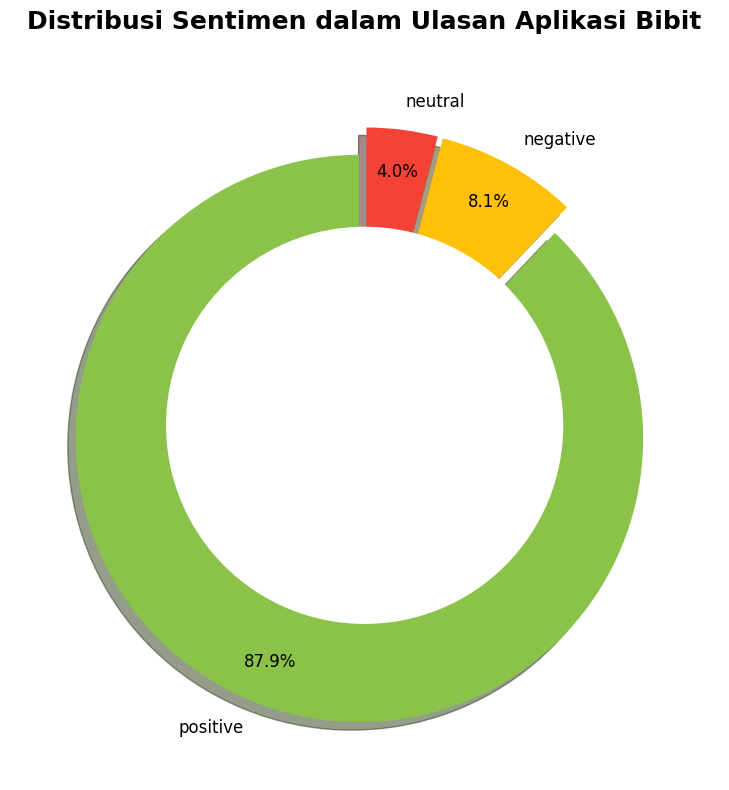

In [33]:
import matplotlib.pyplot as plt

# Menentukan ukuran gambar
fig, ax = plt.subplots(figsize=(8, 8))

# Ambil data dari kolom 'polarity'
sizes = df_clean['polarity'].value_counts().tolist()
labels = df_clean['polarity'].value_counts().index.tolist()

# Warna untuk pie chart (sesuaikan dengan kebutuhan)
colors = ['#8BC34A', '#FFC107', '#F44336']  # Hijau untuk positif, Kuning untuk netral, Merah untuk negatif

# Membuat pie chart
wedges, texts, autotexts = ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=colors,
    explode=[0.05] * len(sizes),  # Mengeluarkan sedikit setiap bagian
    textprops={'fontsize': 12},
    pctdistance=0.85  # Persentase berada di tengah lingkaran
)

# Membuat lingkaran putih di tengah untuk efek donat
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Menambahkan judul
ax.set_title('Distribusi Sentimen dalam Ulasan Aplikasi Bibit', fontsize=18, pad=30, fontweight='bold')

# Menyusun tata letak dengan rapi
plt.tight_layout()

# Menampilkan pie chart
plt.show()


In [27]:
# Mengatur kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = df_clean[df_clean['polarity'] == 'positive']
# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
# Mengurutkan DataFrame 'positive_tweets'
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
# Mengatur ulang indeks DataFrame
positive_tweets = positive_tweets.reset_index(drop=True)
# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [28]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = df_clean[df_clean['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [29]:
pd.set_option('display.max_colwidth', 3000)
neutral_tweets = df_clean[df_clean['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)

neutral_tweets.index += 1


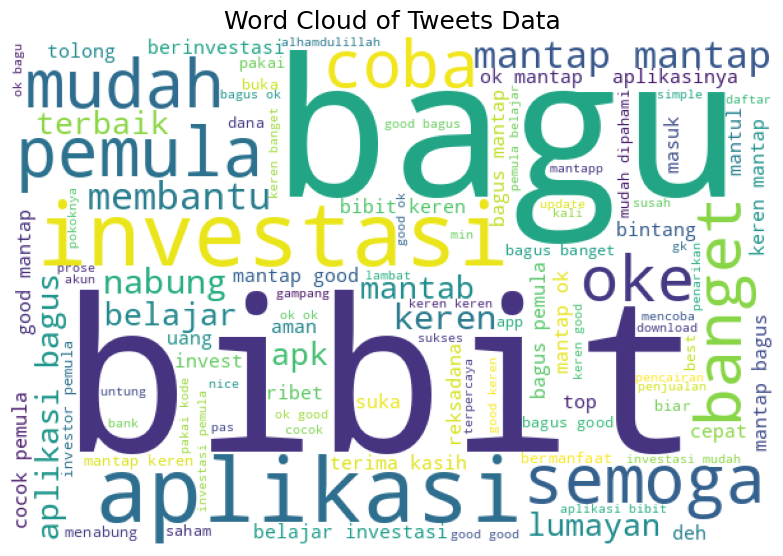

In [30]:
# Membuat string kosong 'list_words'
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'df_clean'.
for tweet in df_clean['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

# Membuat objek WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu
fig, ax = plt.subplots(figsize=(8, 6))
# Menetapkan judul
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
# Menonaktifkan grid pada sumbu
ax.grid(False)
# Menampilkan word cloud dalam gambar
ax.imshow((wordcloud))
# Mengatur layout gambar
fig.tight_layout(pad=0)
# Menyembunyikan sumbu.
ax.axis('off')
# Menampilkan word cloud.
plt.show()


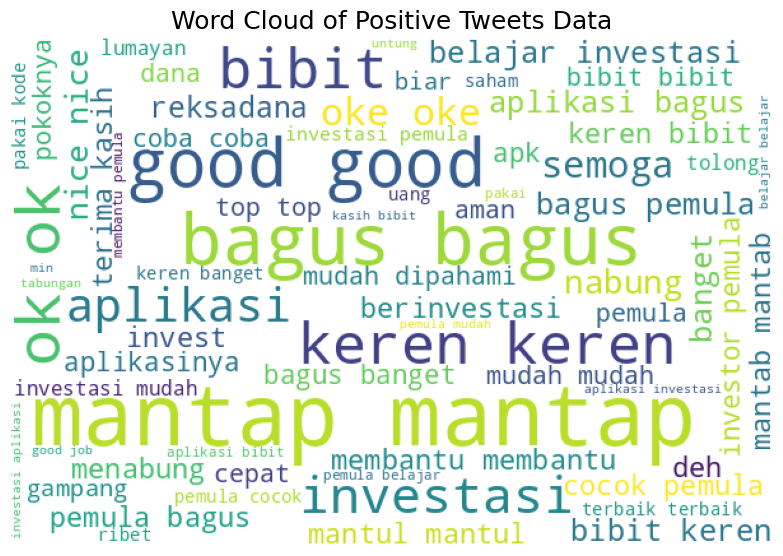

In [31]:

list_words = ''

for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

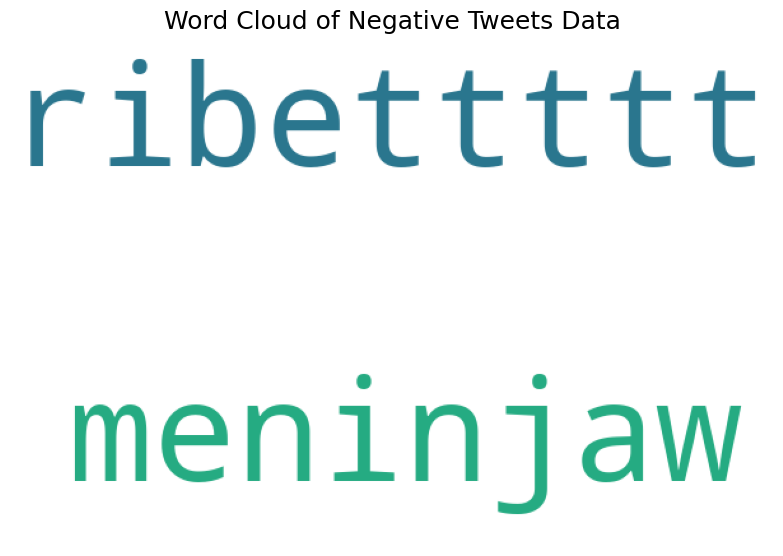

In [32]:
list_words = ''

for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

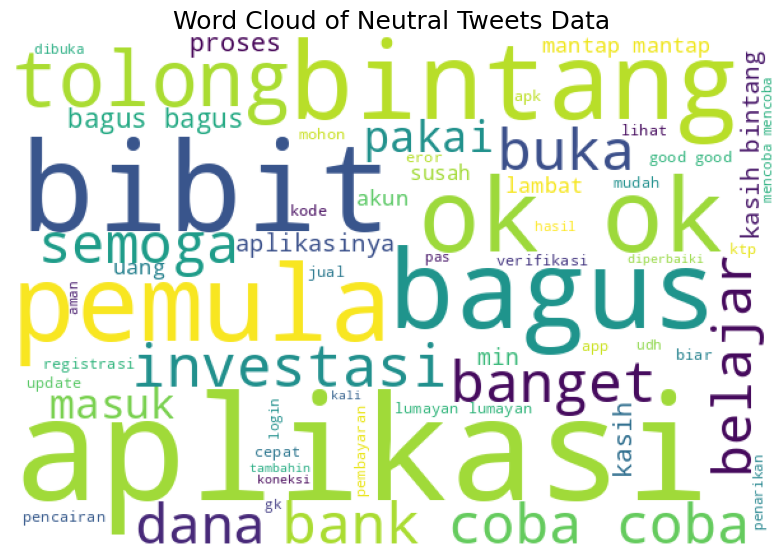

In [33]:
list_words = ''

for tweet in neutral_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)

ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

# Data Splitting


In [34]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df_clean['text_akhir']
y = df_clean['polarity']

# Skema Pelatihan 1


Pelatihan: SVM, Ekstraksi Fitur: TF-IDF, Pembagian Data: 80/20

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [36]:
# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_clean['polarity'])

In [37]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_clean['text_akhir'])

# Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
# Prediksi sentimen
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Evaluasi akurasi
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM + TF-IDF - accuracy_train:', accuracy_train_svm)
print('SVM + TF-IDF - accuracy_test:', accuracy_test_svm)

SVM + TF-IDF - accuracy_train: 0.9328566234395831
SVM + TF-IDF - accuracy_test: 0.909112942317014


# Skema Pelatihan 2

Pelatihan: Logistic Regression, Ekstraksi Fitur: TF-IDF, Pembagian Data: 70/30



In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=10000,
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)
X = tfidf_vectorizer.fit_transform(df_clean['text_akhir'])

# Encode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_clean['polarity'])

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

logreg_model = LogisticRegression(
      C=5,
      penalty='l2',
      solver='lbfgs',
      max_iter=2000
  )

logreg_model.fit(X_train, y_train)

y_pred_train_logreg = logreg_model.predict(X_train)
y_pred_test_logreg = logreg_model.predict(X_test)

print('\nLogistic Regression + TF-IDF - accuracy_train:', accuracy_score(y_train, y_pred_train_logreg))
print('Logistic Regression + TF-IDF - accuracy_test:', accuracy_score(y_test, y_pred_test_logreg))



Logistic Regression + TF-IDF - accuracy_train: 0.957337765773253
Logistic Regression + TF-IDF - accuracy_test: 0.9083858458555502


# Skema Pelatihan 3


Pelatihan: LSTM, Ekstraksi Fitur: Word2Vec, Pembagian Data: 80/20



In [58]:
!pip install gensim==4.3.3

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Perhatikan lokasi baru pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, BatchNormalization
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

In [34]:
tokenized_text = df_clean['text_stopword']

# Latih Word2Vec
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, sg=1)

In [35]:
# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(tokens) for tokens in tokenized_text])
sequences = tokenizer.texts_to_sequences([' '.join(tokens) for tokens in tokenized_text])
padded = pad_sequences(sequences, maxlen=100)

y = df_clean['polarity']

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(padded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Embedding
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Callback
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.94:
            print("\nAkurasi telah mencapai >94%!")
            self.model.stop_training = True

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, weights=[embedding_matrix],
                    trainable=True))  # Hapus input_length
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.1,
          callbacks=[myCallback(), early_stop, checkpoint])

Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7469 - loss: 0.7380

233/233 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.7474 - loss: 0.7372 - val_accuracy: 0.8855 - val_loss: 0.7214
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8852 - loss: 0.3748

233/233 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8852 - loss: 0.3748 - val_accuracy: 0.8910 - val_loss: 0.4420
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8942 - loss: 0.3411

233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8942 - loss: 0.3411 - val_accuracy: 0.8928 - val_loss: 0.3383
Epoch 4/50
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9001 - loss: 0.3225

233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9001 - loss: 0.3225 - val_accuracy: 0.8952 - val_loss: 0.3214
Epoch 5/50
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9076 - loss: 0.3051

233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9076 - loss: 0.3051 - val_accuracy: 0.9043 - val_loss: 0.3040
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9143 - loss: 0.2876

233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9144 - loss: 0.2876 - val_accuracy: 0.9067 - val_loss: 0.2825
Epoch 7/50
231/233 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9202 - loss: 0.2602

233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9202 - loss: 0.2602 - val_accuracy: 0.9091 - val_loss: 0.2949
Epoch 8/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9253 - loss: 0.2473 - val_accuracy: 0.9085 - val_loss: 0.3050
Epoch 9/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9321 - loss: 0.2267 - val_accuracy: 0.9001 - val_loss: 0.3119
Epoch 10/50
231/233 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9310 - loss: 0.2260

233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9310 - loss: 0.2260 - val_accuracy: 0.9176 - val_loss: 0.2781
Epoch 11/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9326 - loss: 0.2218 - val_accuracy: 0.9122 - val_loss: 0.2893
Epoch 12/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9363 - loss: 0.2147 - val_accuracy: 0.9104 - val_loss: 0.2950
Epoch 13/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9397 - loss: 0.2018 - val_accuracy: 0.9091 - val_loss: 0.3225
Epoch 14/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9394 - loss: 0.1941 - val_accuracy: 0.8946 - val_loss: 0.3453
Epoch 15/50
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9392 - loss: 0.1960
Akurasi telah mencapai >94%!
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9393 - loss: 0.1960 - val_accuracy: 0.9043 - val_loss: 0.3228


In [36]:
# Evaluasi
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('LSTM + Word2Vec - accuracy_train:', train_acc)
print('LSTM + Word2Vec - accuracy_test:', test_acc)

516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9354 - loss: 0.2094
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9124 - loss: 0.2931
LSTM + Word2Vec - accuracy_train: 0.935886561870575
LSTM + Word2Vec - accuracy_test: 0.91032475233078


In [53]:
# Fungsi untuk prediksi satu kalimat
def prediksi_sentimen(teks):
    teks = teks.lower()

    # Transformasi TF-IDF
    teks_tfidf = tfidf_vectorizer.transform([teks])

    # Prediksi
    pred_label = logreg_model.predict(teks_tfidf)

    # Konversi label numerik ke label aslinya (Positif, Negatif, Netral)
    kategori = label_encoder.inverse_transform(pred_label)

    return kategori[0]

# Contoh penggunaan
contoh_kalimat = "aplikasinya bagus untuk pemula tetapi banyak bugnya"
hasil = prediksi_sentimen(contoh_kalimat)
print(f"Kalimat: {contoh_kalimat}")
print(f"Prediksi Sentimen: {hasil}")


Kalimat: aplikasinya bagus untuk pemula tetapi banyak bugnya
Prediksi Sentimen: netral
